# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  

Created by NAMES (SJSU IDs): May Sabai (017390438), Jerry Nguyen (016437330), Anusri Nagarajan (017743700)

Last updated: Sept 26, 2025

Briefly describe your dataset

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
renter_affordability = pd.read_csv('/content/drive/MyDrive/project/data/2024_renter_affordability_data.csv')

### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
renter_affordability.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,2
Population,389
Minimum Wage,0
Renter Income,2


In [ ]:
renter_affordability= renter_affordability.drop('Population', axis=1)

In [ ]:
# Remove any commas or $ signs, then convert to float
renter_affordability['Average Affordability'] = pd.to_numeric(
    renter_affordability['Average Affordability'].astype(str).str.replace(',', ''), errors='coerce'
)

renter_affordability['Renter Income'] = pd.to_numeric(
    renter_affordability['Renter Income'].astype(str).str.replace(',', ''), errors='coerce'
)

In [ ]:
renter_affordability[renter_affordability['Renter Income'].isna()]


,RegionID,SizeRank,CityName,StateName,abb_StateName,Average Affordability,Minimum Wage,Renter Income
216,394928,410,Ocean City,New Jersey,NJ,NaN,15.13,NaN
266,395062,469,Sandusky,Ohio,OH,NaN,10.45,NaN


In [ ]:
renter_affordability = renter_affordability[renter_affordability['CityName'] != 'Sandusky']
renter_affordability = renter_affordability[renter_affordability['CityName'] != 'Ocean City']

In [ ]:
renter_affordability.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,0
Minimum Wage,0
Renter Income,0


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
renter_affordability.dtypes

,0
RegionID,int64
SizeRank,int64
CityName,object
StateName,object
abb_StateName,object
Average Affordability,float64
Minimum Wage,float64
Renter Income,float64


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

Text(0.5, 1.05, 'Pairplots for Average Affordability, Minimum Wage, and Renter Income')

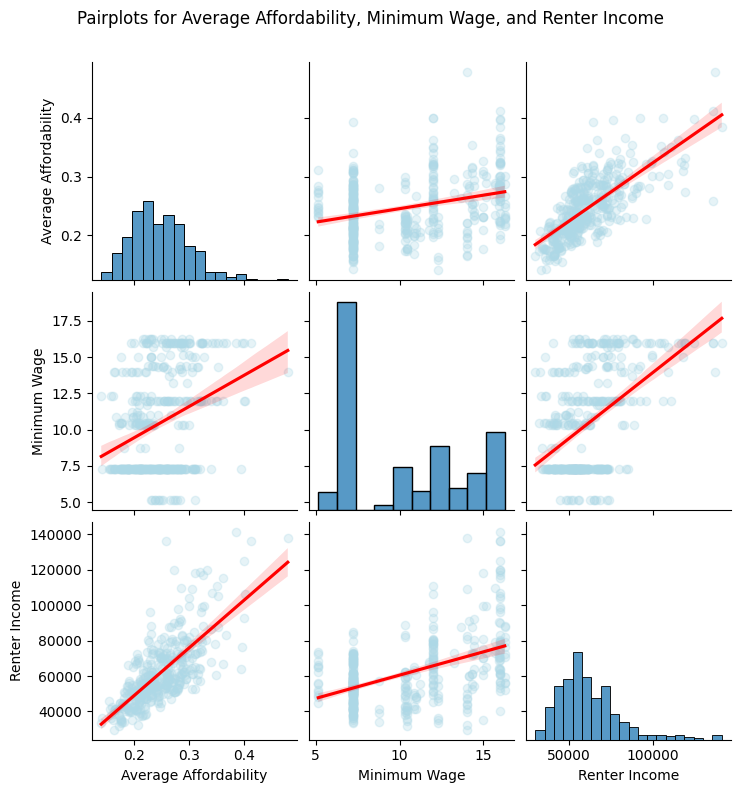

In [ ]:
# Your code here . . .
# population vs affordability per state
sns.pairplot(
    data=renter_affordability.drop(['RegionID','SizeRank','CityName','StateName','abb_StateName'], axis=1),
    kind='reg',
    plot_kws={'scatter_kws': {'alpha':0.3, 'color':'lightblue'},'line_kws': {'color':'red'}}
)
plt.suptitle('Pairplots for Average Affordability, Minimum Wage, and Renter Income', y=1.05)


As the average affordability values increase (the less affordable it is), the renter income also increases because higher affordability requires higher income.
We also noticed that greater renter income values are associated with greater minimum wage values.

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

Text(0.5, 1.0, 'Renter Income vs. Average Affordability')

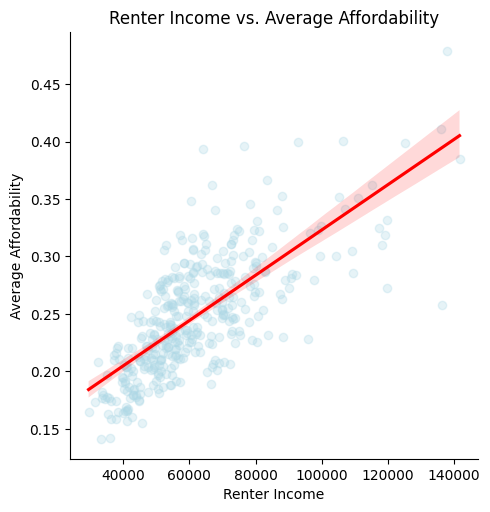

In [ ]:
# Your code here . . .
sns.lmplot(
    data=renter_affordability,
    x='Renter Income',
    y='Average Affordability',
    scatter_kws={'alpha':0.3, 'color':'lightblue'},
    line_kws={'color':'red'}
)

plt.title('Renter Income vs. Average Affordability')

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

Text(0.5, 1.0, 'Renter Income vs. Average Affordability by State and Minimum Wage')

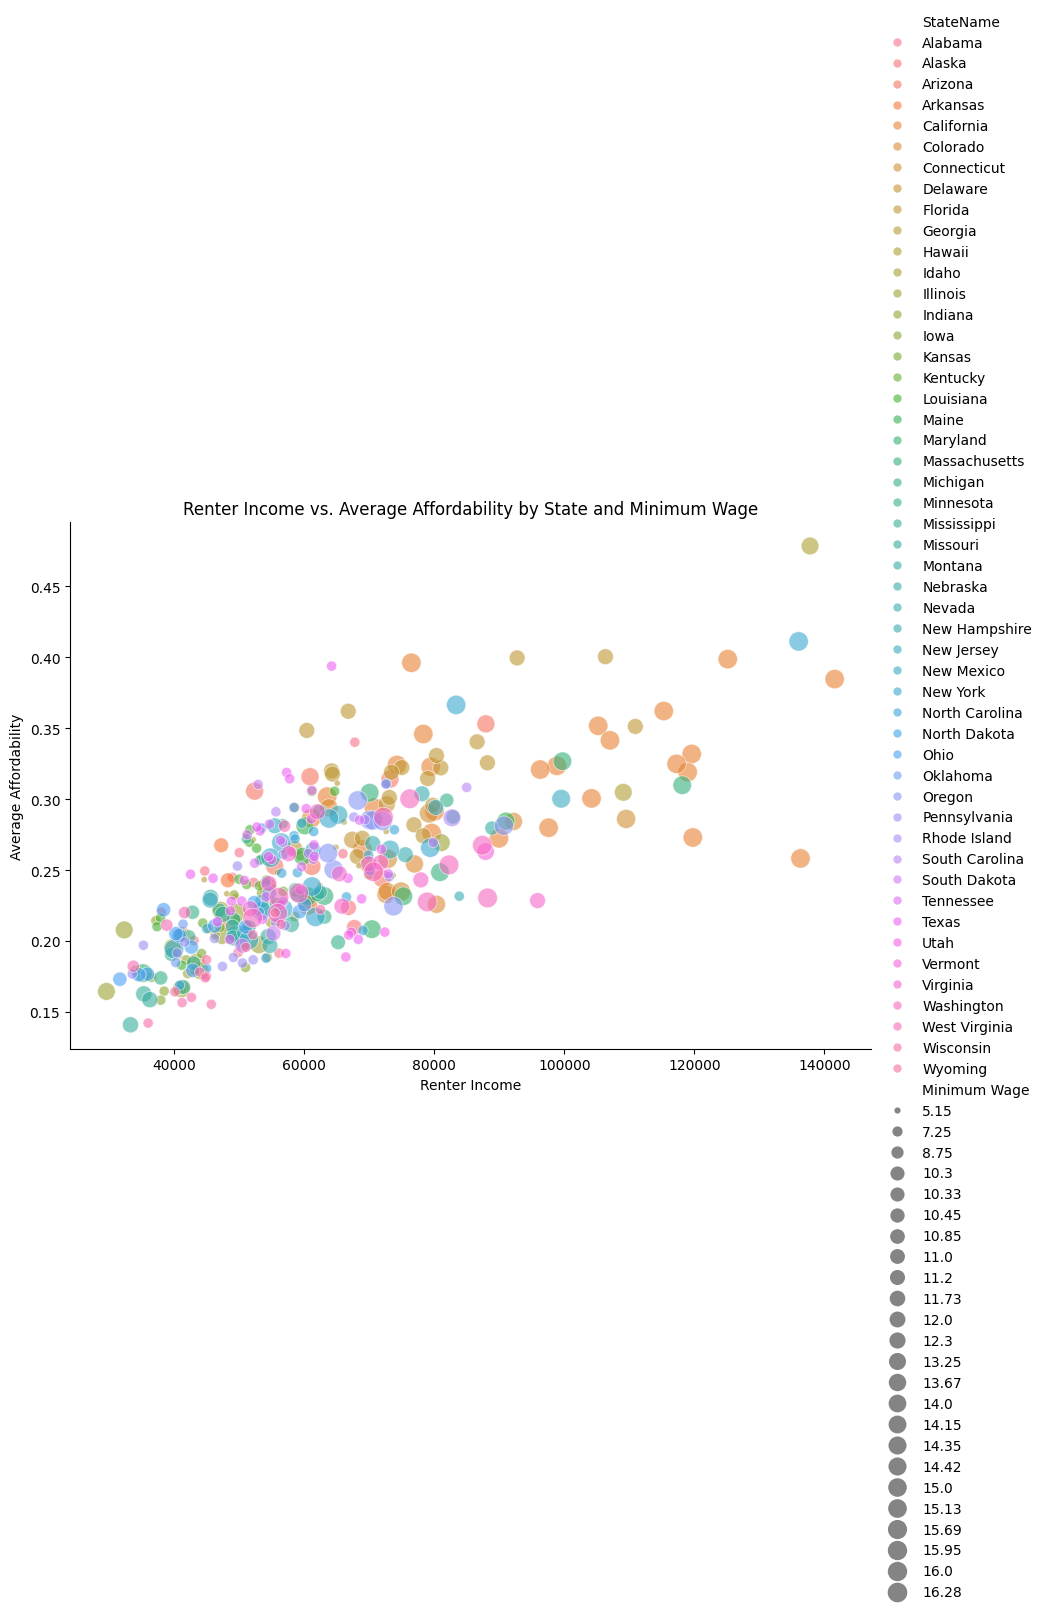

In [ ]:
# Your code here . . .

sns.relplot(
    data=renter_affordability,
    x='Renter Income',
    y='Average Affordability',
    hue='StateName',
    size='Minimum Wage',
    sizes=(20, 200),
    alpha=0.6,
    height=6,
    aspect=1.5,
    legend="full"  # makes seaborn show both legends
)

plt.title('Renter Income vs. Average Affordability by State and Minimum Wage')


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

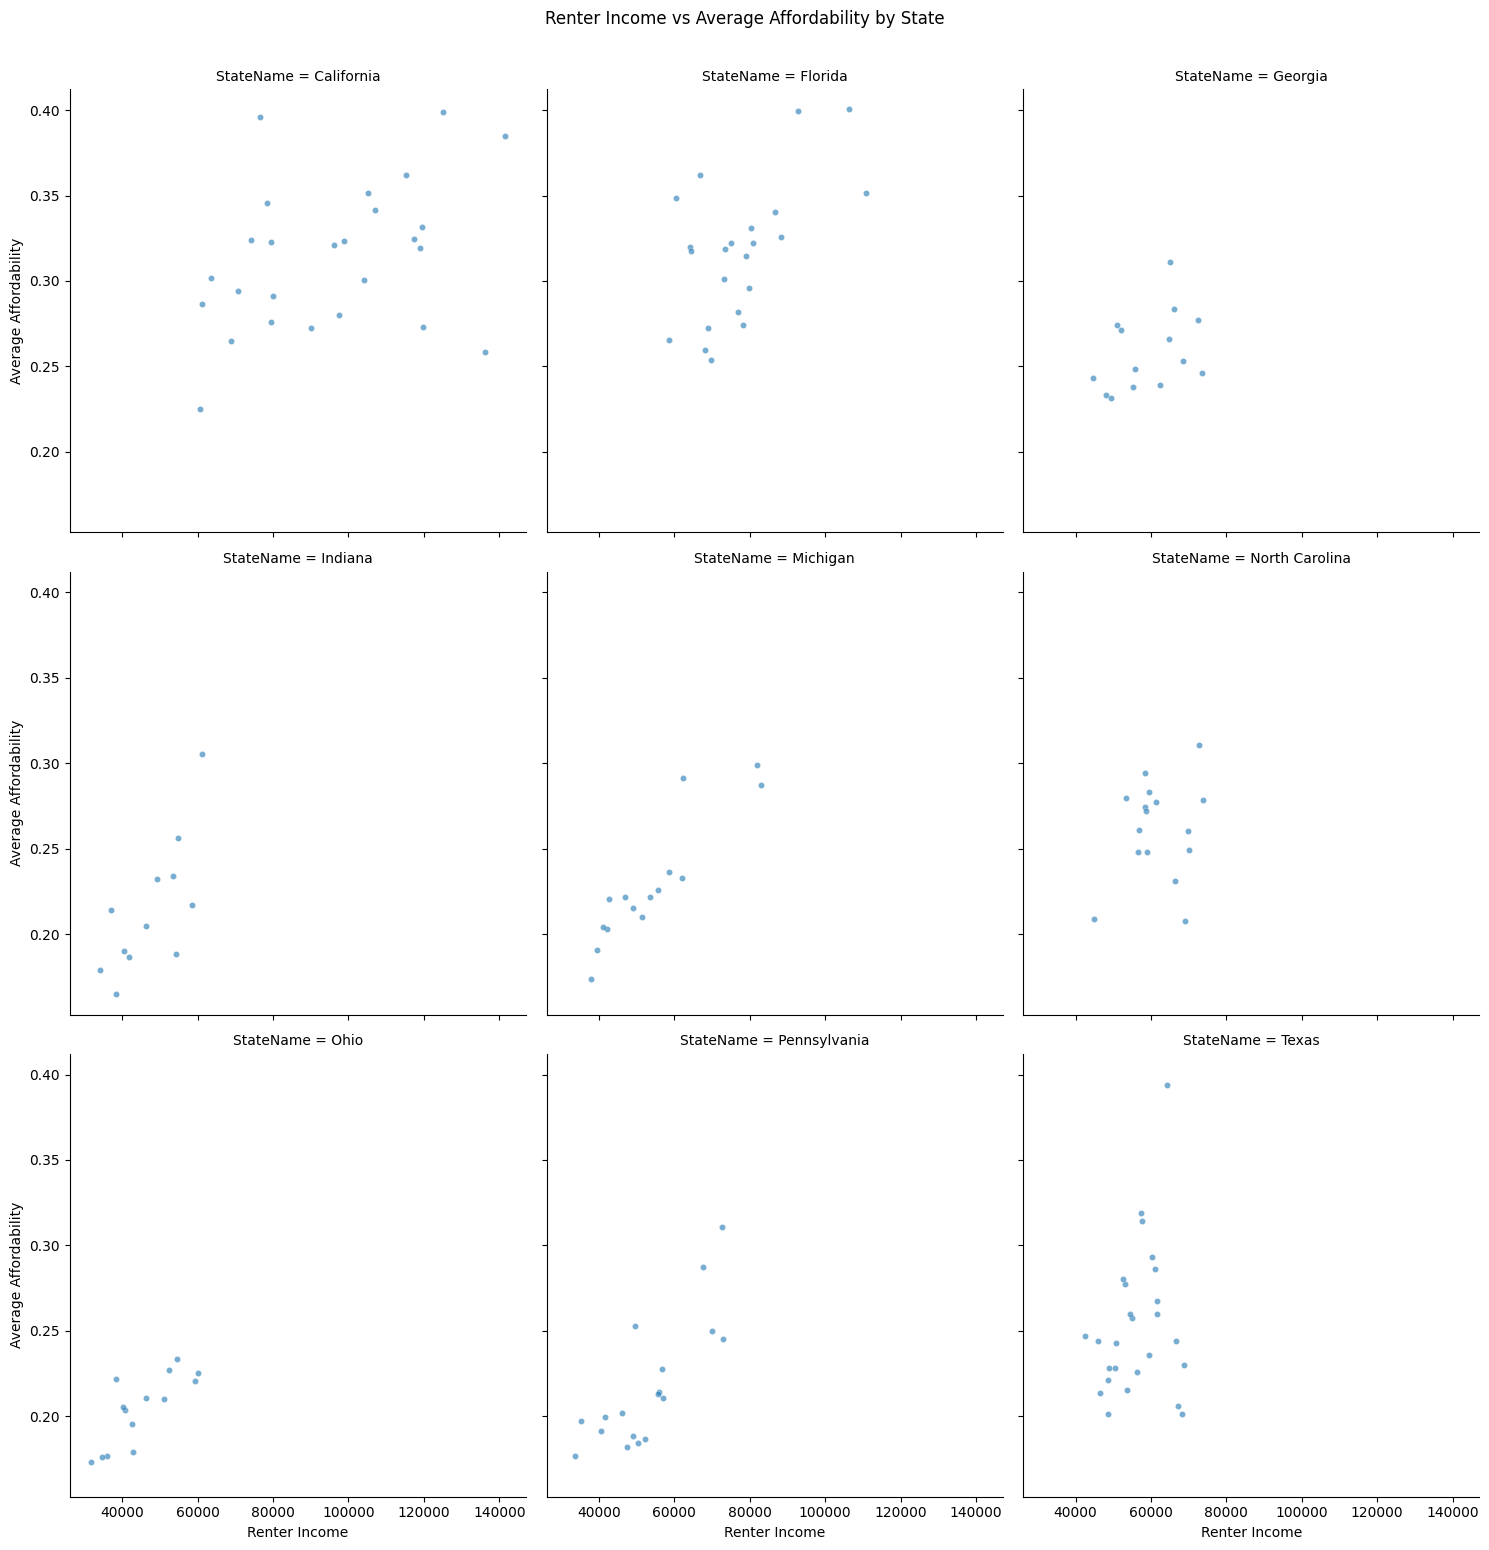

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering to the top 9 states with the largest amount of data points/rows for readability
top_states = renter_affordability['StateName'].value_counts().nlargest(9).index
filtered_data = renter_affordability[renter_affordability['StateName'].isin(top_states)]

# Small multiples plot
sns.relplot(
    data=filtered_data,
    x='Renter Income',
    y='Average Affordability',
    col='StateName',       # facet by state
    col_wrap=3,            # 3 plots per row
    height=5,
    s=20,                  # size of points
    alpha=0.6              # transparency
)

plt.suptitle('Renter Income vs Average Affordability by State', y=1.03)
plt.show()
